# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
df = pd.read_csv('churn_telecon_tratado.csv')
df.head()

,CustomerID,Gender,Senior,Married,Dependents,Tenure,PhoneService,InternetService,SecurityService,TechinicalSupport,StreamingTV,ContractType,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0.0,dsl,0,0,0,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1.0,dsl,1,0,0,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1.0,dsl,1,0,0,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0.0,dsl,1,1,0,One year,Bank transfer (automatic),71.45,1840.75,0
4,8191-XWSZG,Female,0,0,0,52,1.0,no,0,0,0,One year,Mailed check,71.45,1022.95,0


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [ ]:
#A)
cols_quants = ['Tenure', 'MonthlyCharges', 'TotalCharges'] 
df[cols_quants].describe()

#B)
# A coluna TotalCharges é a que mostra uma grande variação entre a média e a mediana, além de mostar quartis com saltos não uniformes

,Tenure,MonthlyCharges,TotalCharges
count,2488.000000,2488.000000,2488.000000
mean,32.352090,66.342564,2290.087178
std,24.636885,28.051718,2264.585643
min,0.000000,18.400000,18.800000
25%,8.000000,45.400000,402.337500
50%,29.000000,71.450000,1402.900000
75%,56.000000,87.712500,3867.162500
max,72.000000,118.650000,8564.750000


/tmp/ipykernel_7803/3814281034.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')


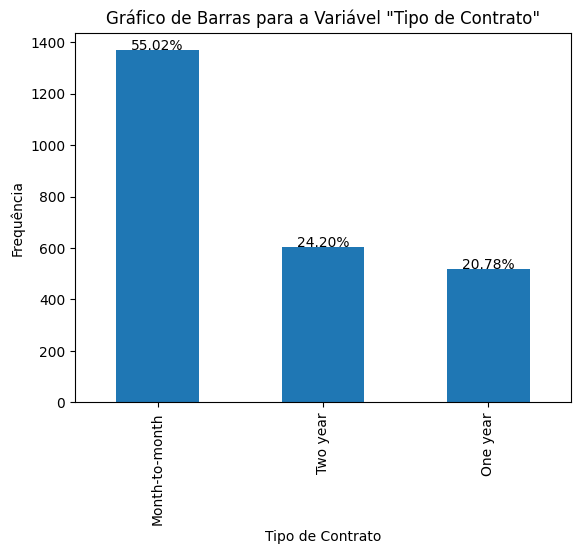

/tmp/ipykernel_7803/3814281034.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')


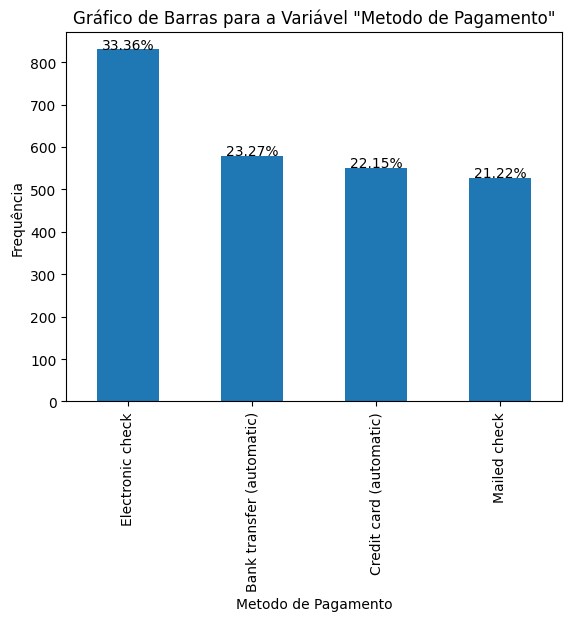

/tmp/ipykernel_7803/3814281034.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')


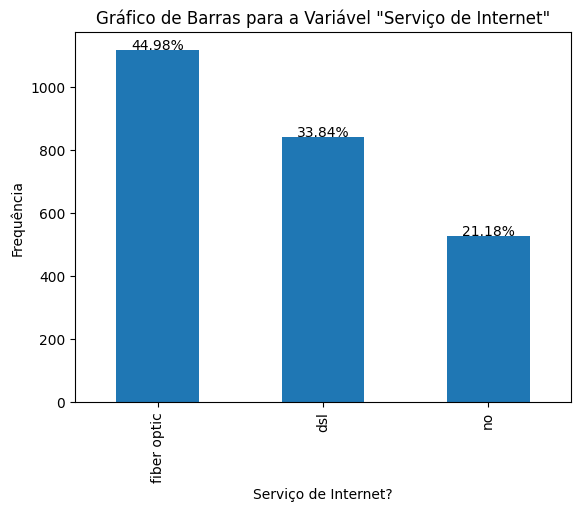

/tmp/ipykernel_7803/3814281034.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')


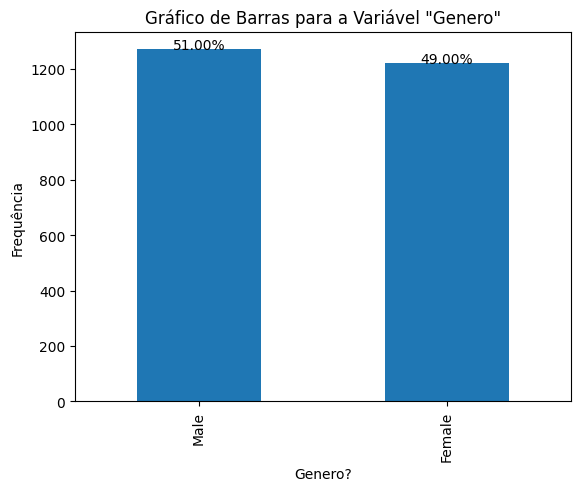

In [18]:
#C)

contagem = df['ContractType'].value_counts()
percentual = (contagem / contagem.sum()) * 100
ax = contagem.plot(kind='bar')
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável "Tipo de Contrato"')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frequência')
plt.show()

contagem = df['PaymentMethod'].value_counts()
percentual = (contagem / contagem.sum()) * 100
ax = contagem.plot(kind='bar')
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável "Metodo de Pagamento"')
plt.xlabel('Metodo de Pagamento')
plt.ylabel('Frequência')
plt.show()

contagem = df['InternetService'].value_counts()
percentual = (contagem / contagem.sum()) * 100
ax = contagem.plot(kind='bar')
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável "Serviço de Internet"')
plt.xlabel('Serviço de Internet?')
plt.ylabel('Frequência')
plt.show()

contagem = df['Gender'].value_counts()
percentual = (contagem / contagem.sum()) * 100
ax = contagem.plot(kind='bar')
for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{percentual[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável "Genero"')
plt.xlabel('Genero?')
plt.ylabel('Frequência')
plt.show()

## Resposta da C
 Todas as variáveis categoricas que não são binárias apresentam uma boa distribuição, felizmente todas podem ser usadas para avaliar o churn, no caso da variável relacionada ao tipo de contrato, talvez seria bom até dividir entre quem paga mensalmente e quem tem um contrato de longa duração.

In [21]:
#D

booleanas = ['Senior','Married', 'Dependents', 'PhoneService', 'SecurityService', 'TechinicalSupport', 'StreamingTV', 'Churn']
for i in booleanas:
    print(f'\nDistribuição da coluna {i}\n')
    print(df[i].value_counts(normalize=True)*100)


Distribuição da coluna Senior

Senior
0    83.842444
1    16.157556
Name: proportion, dtype: float64

Distribuição da coluna Married

Married
0    50.723473
1    49.276527
Name: proportion, dtype: float64

Distribuição da coluna Dependents

Dependents
0    68.528939
1    31.471061
Name: proportion, dtype: float64

Distribuição da coluna PhoneService

PhoneService
1.0    96.543408
0.0     3.456592
Name: proportion, dtype: float64

Distribuição da coluna SecurityService

SecurityService
0    71.583601
1    28.416399
Name: proportion, dtype: float64

Distribuição da coluna TechinicalSupport

TechinicalSupport
0    71.42283
1    28.57717
Name: proportion, dtype: float64

Distribuição da coluna StreamingTV

StreamingTV
0    61.414791
1    38.585209
Name: proportion, dtype: float64

Distribuição da coluna Churn

Churn
0    73.995177
1    26.004823
Name: proportion, dtype: float64


## Resposta da D

As vaŕiaveis Married e StreamingTV tem uma boa distribuição, ótimas para a análise.

As variáveis Senior e PhoneService são muito enviesadas, então seria melhor deixar elas de lado. 

As outras variáveis não tem uma distribuição tão boa quanto Married e StreamingTV, mas ainda possuem uma distribuição aceitável para fazer análise.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [22]:
cols_quants

['Tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
fig = px.box(df, y='Tenure', title='Box Plot do tempo de relacionamento', labels={'Tempo de Relacionamento': 'Valores'})
fig.show()

fig = px.box(df, y='MonthlyCharges', title='Box Plot da cobrança mensal', labels={'Cobrança Mensal': 'Valores'})
fig.show()

fig = px.box(df, y='TotalCharges', title='Box Plot da cobrança total', labels={'Cobrança Total': 'Valores'})
fig.show()

## Resposta da 3

Nesse caso, creio por ter pego a base de dados já tratada do módulo anterior, nenhuma das colunas quantitativas apresentou outlier, mas só para indicar o que seria feito:

Substituiria os valores outliers (acima do limite superior ou abaixo do limite inferior) por ou mediana ou média, no caso das colunas apresentadas, provavelmente seria a mediana, já que a distribuição não é tão normal assim, existindo um peso, ou seja, uma distribuição com cauda.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

# Colunas binárias (booleanas)

In [36]:
print('Genero\n')

df_grouped = df.groupby(['Churn', 'Gender']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Gender', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Genero',
                  yaxis_title='Porcentagem')
fig.show()

print('\nCasado\n')

df_grouped = df.groupby(['Churn', 'Married']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Married', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Casados',
                  yaxis_title='Porcentagem')
fig.show()

print('\nDependentes\n')

df_grouped = df.groupby(['Churn', 'Dependents']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='Dependents', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Pessoas Com Dependentes',
                  yaxis_title='Porcentagem')
fig.show()

print('\nServiço de Segurança\n')

df_grouped = df.groupby(['Churn', 'SecurityService']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='SecurityService', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Contratação de Serviço de Segurança',
                  yaxis_title='Porcentagem')
fig.show()

print('\nStreaming de TV\n')

df_grouped = df.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='StreamingTV', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Contratação de Streaming',
                  yaxis_title='Porcentagem')
fig.show()

Genero




Casado




Dependentes




Serviço de Segurança




Streaming de TV



As variáveis que indicam se a pessoa é casada, se tem dependentes e se contratou o serviço de segurança mostram grande oportunidade para prever o churn.

# Colunas Categoricas

In [39]:
print('Tipo de Contrato\n')

df_grouped = df.groupby(['Churn', 'ContractType']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='ContractType', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Tipo de Contrato',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo de Contrato')
fig.show()

print('\nMétodo de Pagamento\n')

df_grouped = df.groupby(['Churn', 'PaymentMethod']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='PaymentMethod', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Método de Pagamento',
                  yaxis_title='Porcentagem',
                  legend_title='Método de Pagamento')
fig.show()

print('\nServiço de Internet\n')

df_grouped = df.groupby(['Churn', 'InternetService']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100


fig = px.bar(df_grouped, x='Churn', y='percent', color='InternetService', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem'})

fig.update_layout(title='Relação entre Churn e Serviço de Internet',
                  yaxis_title='Porcentagem',
                  legend_title='Serviço de Internet')
fig.show()

Tipo de Contrato




Método de Pagamento




Serviço de Internet



As variáveis categoricas foram bem reveladoras, porque a distribuição entre churn e não churn mudou muito.

Quem usa o método mensal de pagamento tem bem mais chance de churn.

Quem usa o método de pagamento "Eletcronic Check" tem bem mais chance de churn.

Quem usa internet fibra optica tem bem mais chance de Chrun.

Se é possível perceber isso apenas visualmente, essas variáveis serão ótimas para o modelo preditivo de churn. 